# Visualization with Matplotlib, Pandas, and Seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Getting started with matplotlib

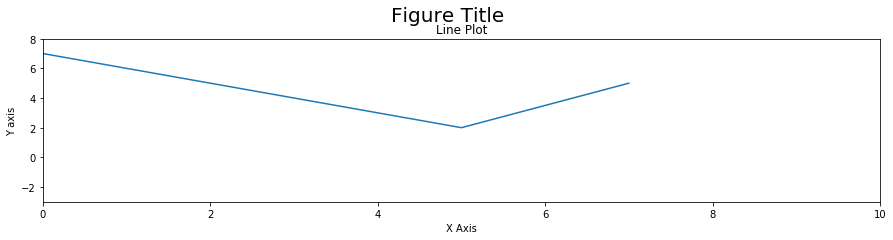

In [2]:
x = [-3, 5, 7]
y = [10, 2, 5]

plt.figure(figsize=(15,3))
plt.plot(x, y)
plt.xlim(0, 10)
plt.ylim(-3, 8)
plt.xlabel('X Axis')
plt.ylabel('Y axis')
plt.title('Line Plot')
plt.suptitle('Figure Title', size=20, y=1.03)

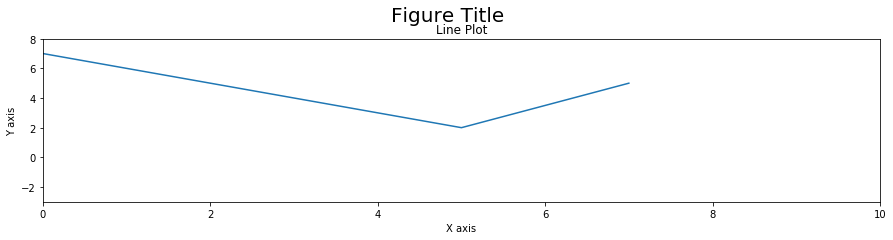

In [3]:
fig, ax = plt.subplots(figsize=(15,3))
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-3, 8)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('Line Plot')
fig.suptitle('Figure Title', size=20, y=1.03)

In [4]:
import matplotlib.pyplot as plt

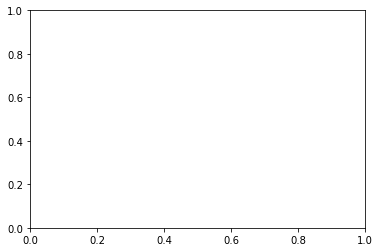

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1)

tuple

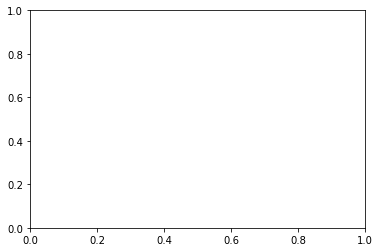

In [6]:
plot_objects = plt.subplots(nrows=1, ncols=1)
type(plot_objects)
tuple

In [7]:
fig = plot_objects[0]
ax = plot_objects[1]

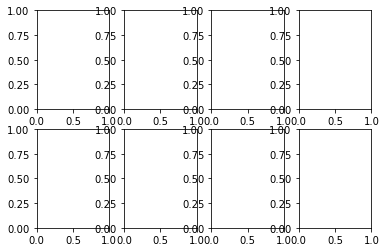

In [8]:
plot_objects = plt.subplots(2, 4)

In [9]:
plot_objects[1]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009A91A90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000009D67A58>]], dtype=object)

In [10]:
type(fig)

matplotlib.figure.Figure

In [11]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [12]:
fig.get_size_inches()

array([ 6.,  4.])

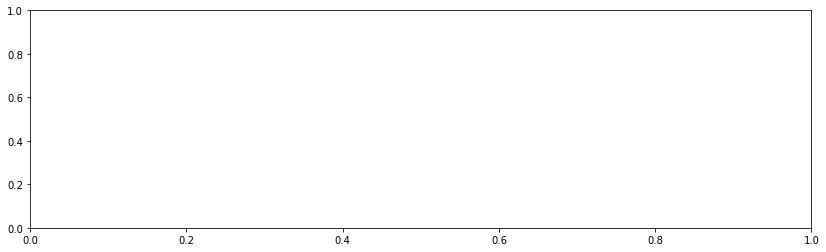

In [13]:
fig.set_size_inches(14, 4)
fig

In [14]:
fig.axes

In [15]:
fig.axes[0] is ax

True

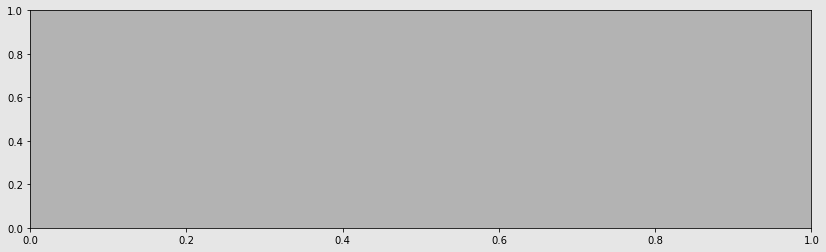

In [16]:
fig.set_facecolor('.9')
ax.set_facecolor('.7')
fig

In [17]:
ax_children = ax.get_children()
ax_children

In [18]:
spines = ax.spines
spines

OrderedDict([('left', <matplotlib.spines.Spine at 0x99ba550>),
             ('right', <matplotlib.spines.Spine at 0x99b2128>),
             ('bottom', <matplotlib.spines.Spine at 0x99b2518>),
             ('top', <matplotlib.spines.Spine at 0x99b2240>)])

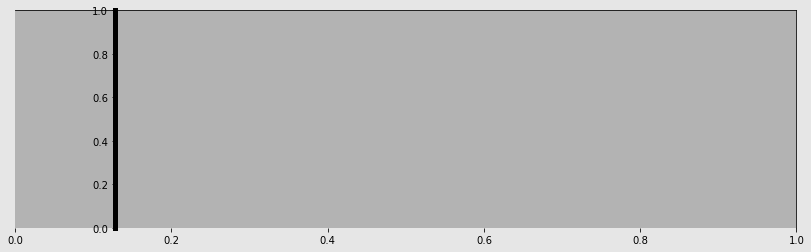

In [19]:
spine_left = spines['left']
spine_left.set_position(('outward', -100))
spine_left.set_linewidth(5)

spine_bottom = spines['bottom']
spine_bottom.set_visible(False)
fig

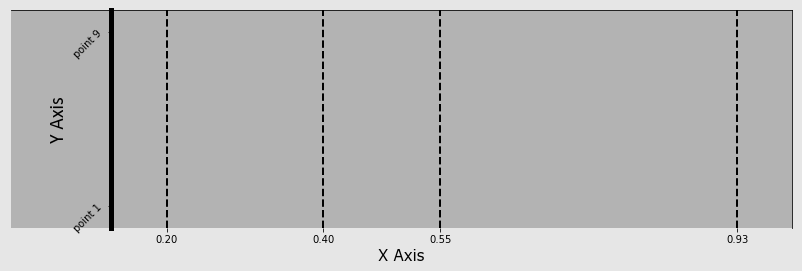

In [20]:
ax.xaxis.grid(True, which='major', linewidth=2, color='black', linestyle='--')
ax.xaxis.set_ticks([.2, .4, .55, .93])
ax.xaxis.set_label_text('X Axis', family='Verdana', fontsize=15)

ax.set_ylabel('Y Axis', family='Calibri', fontsize=20)
ax.set_yticks([.1, .9])
ax.set_yticklabels(['point 1', 'point 9'], rotation=45)
fig

### Visualizing data with matplotlib

In [21]:
movie = pd.read_csv('data/movie.csv')

med_budget = movie.groupby('title_year')['budget'].median() / 1e6
med_budget_roll = med_budget.rolling(5, min_periods=1).mean()
med_budget_roll.tail()

title_year
2012.0    20.893
2013.0    19.893
2014.0    19.100
2015.0    17.980
2016.0    17.780
Name: budget, dtype: float64

In [22]:
med_budget.loc[2012:2016].mean()

17.78

In [23]:
med_budget.loc[2011:2015].mean()

17.98

In [24]:
med_budget.loc[2010:2014].mean()

19.1

In [25]:
years = med_budget_roll.index.values
years[-5:]

array([ 2012.,  2013.,  2014.,  2015.,  2016.])

In [26]:
budget = med_budget_roll.values
budget[-5:]

array([ 20.893,  19.893,  19.1  ,  17.98 ,  17.78 ])

E:\Anc\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


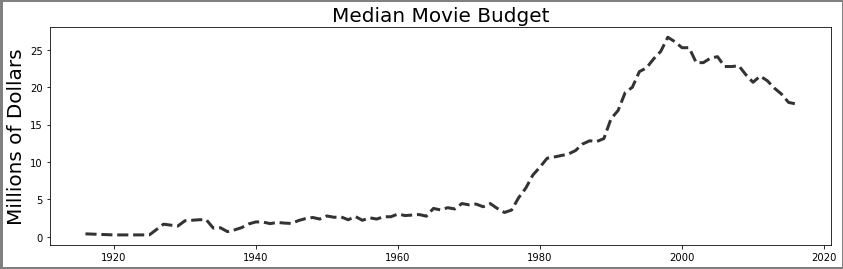

In [27]:
fig, ax = plt.subplots(figsize=(14,4), linewidth=5, edgecolor='.5')
ax.plot(years, budget, linestyle='--', linewidth=3, color='.2', label='All Movies')
text_kwargs=dict(fontsize=20, family='cursive')
ax.set_title('Median Movie Budget', **text_kwargs)
ax.set_ylabel('Millions of Dollars', **text_kwargs)

In [28]:
movie_count = movie.groupby('title_year')['budget'].count()
movie_count.tail()

title_year
2012.0    191
2013.0    208
2014.0    221
2015.0    192
2016.0     86
Name: budget, dtype: int64

E:\Anc\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


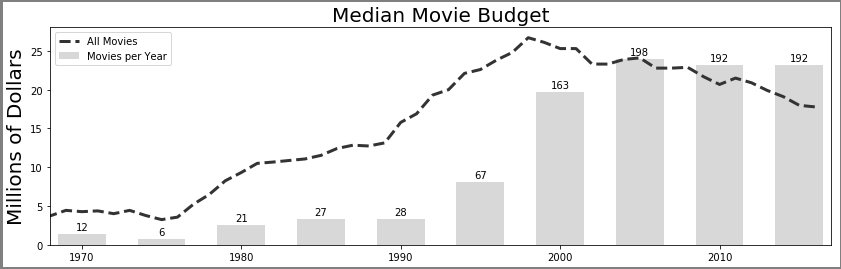

In [29]:
ct = movie_count.values
ct_norm = ct / ct.max() * budget.max()

fifth_year = (years % 5 == 0) & (years >= 1970)
years_5 = years[fifth_year]
ct_5 = ct[fifth_year]
ct_norm_5 = ct_norm[fifth_year]

ax.bar(years_5, ct_norm_5, 3, facecolor='.5', alpha=.3, label='Movies per Year')
ax.set_xlim(1968, 2017)
for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax.text(x, y + .5, str(v), ha='center')
ax.legend()
fig

In [30]:
top10 = movie.sort_values('budget', ascending=False) \
             .groupby('title_year')['budget'] \
             .apply(lambda x: x.iloc[:10].median() / 1e6)
        
top10_roll = top10.rolling(5, min_periods=1).mean()
top10_roll.tail()

title_year
2012.0    192.9
2013.0    195.9
2014.0    191.7
2015.0    186.8
2016.0    189.1
Name: budget, dtype: float64

E:\Anc\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


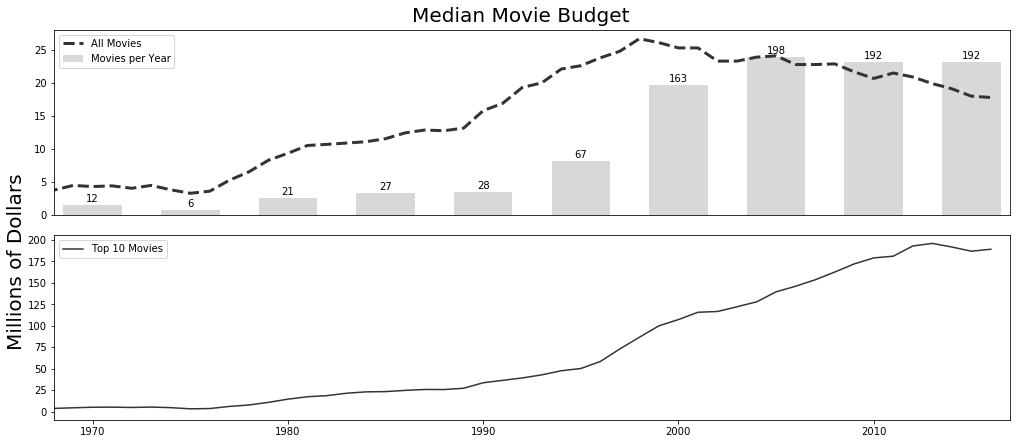

In [31]:
fig2, ax_array = plt.subplots(2, 1, figsize=(14,6), sharex=True)
ax1 = ax_array[0]
ax2 = ax_array[1]

ax1.plot(years, budget, linestyle='--', linewidth=3, color='.2', label='All Movies')
ax1.bar(years_5, ct_norm_5, 3, facecolor='.5', alpha=.3, label='Movies per Year')
ax1.legend(loc='upper left')
ax1.set_xlim(1968, 2017)
plt.setp(ax1.get_xticklines(), visible=False)

for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax1.text(x, y + .5, str(v), ha='center')

ax2.plot(years, top10_roll.values, color='.2', label='Top 10 Movies')
ax2.legend(loc='upper left')

fig2.tight_layout()
fig2.suptitle('Median Movie Budget', y=1.02, **text_kwargs)
fig2.text(0, .6, 'Millions of Dollars', rotation='vertical', ha='center', **text_kwargs)

import os
path = os.path.expanduser('~/Desktop/movie_budget.png')
fig2.savefig(path, bbox_inches='tight')

### Plotting basics with pandas

In [32]:
df = pd.DataFrame(index=['Atiya', 'Abbas', 'Cornelia', 'Stephanie', 'Monte'], 
                  data={'Apples':[20, 10, 40, 20, 50],
                        'Oranges':[35, 40, 25, 19, 33]})
df

,Apples,Oranges
Atiya,20,35
Abbas,10,40
Cornelia,40,25
Stephanie,20,19
Monte,50,33


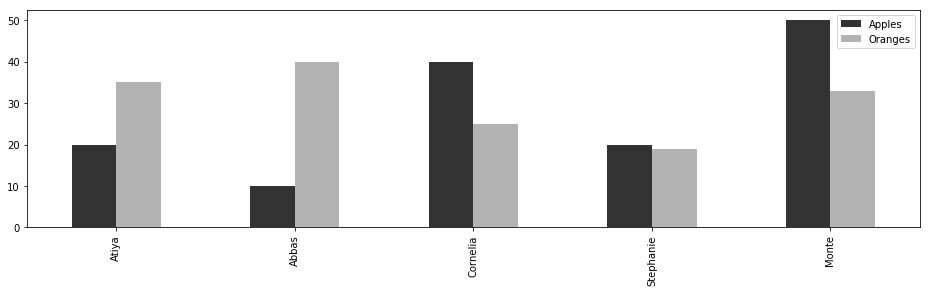

In [33]:
color = ["0.2", "0.7"]
df.plot(kind='bar', color=color, figsize=(16,4))

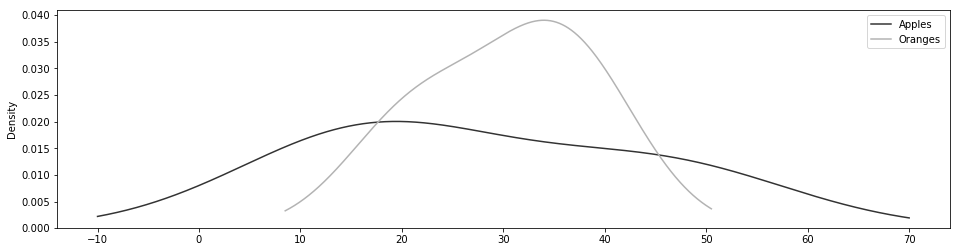

In [34]:
df.plot(kind='kde', color=color, figsize=(16,4))

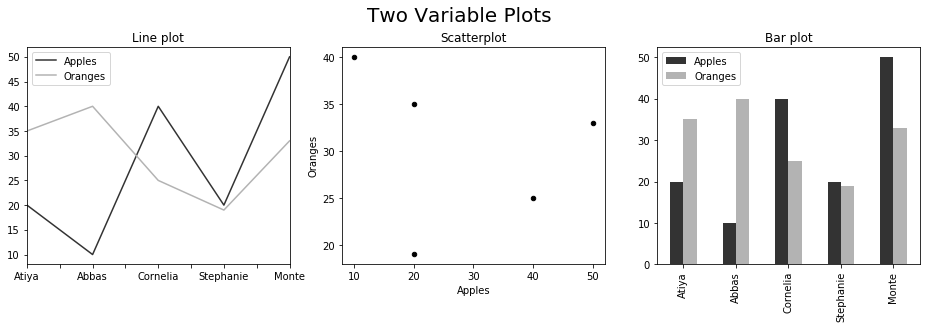

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
fig.suptitle('Two Variable Plots', size=20, y=1.02)
df.plot(kind='line', color=color, ax=ax1, title='Line plot')
df.plot(x='Apples', y='Oranges', kind='scatter', c='k' ,ax=ax2, title='Scatterplot')
df.plot(kind='bar', color=color, ax=ax3, title='Bar plot')

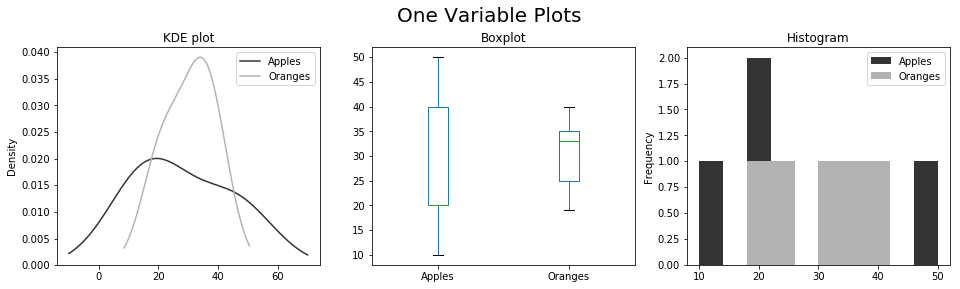

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
fig.suptitle('One Variable Plots', size=20, y=1.02)
df.plot(kind='kde', color=color, ax=ax1, title='KDE plot')
df.plot(kind='box', ax=ax2, title='Boxplot')
df.plot(kind='hist', color=color, ax=ax3, title='Histogram')

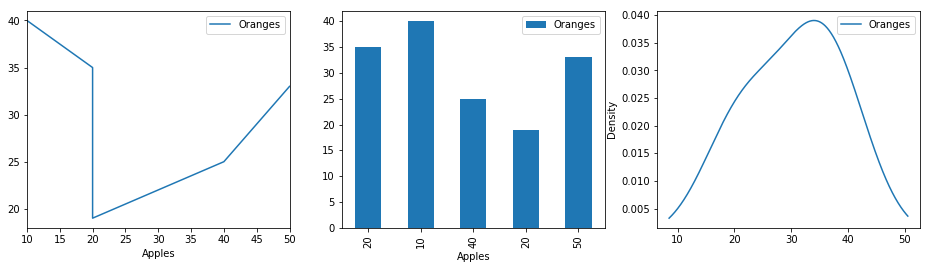

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
df.sort_values('Apples').plot(x='Apples', y='Oranges', kind='line', ax=ax1)
df.plot(x='Apples', y='Oranges', kind='bar', ax=ax2)
df.plot(x='Apples', kind='kde', ax=ax3)

### Visualizing the flights dataset

In [38]:
flights = pd.read_csv('data/flights.csv')
flights.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [39]:
flights['DELAYED'] = flights['ARR_DELAY'].ge(15).astype(int)
cols = ['DIVERTED', 'CANCELLED', 'DELAYED']
flights['ON_TIME'] = 1 - flights[cols].any(axis=1)

cols.append('ON_TIME')
status = flights[cols].sum()
status

DIVERTED       137
CANCELLED      881
DELAYED      11685
ON_TIME      45789
dtype: int64

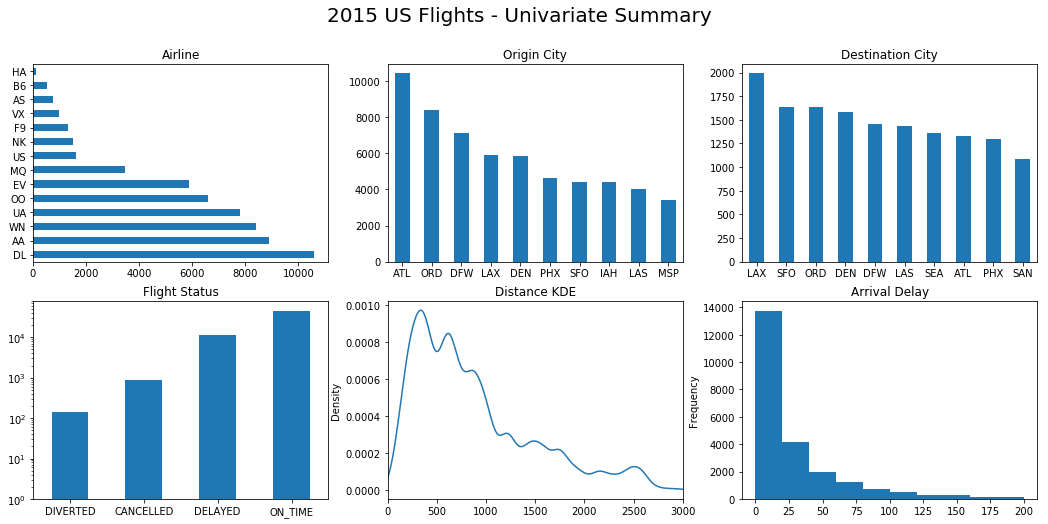

In [40]:
fig, ax_array = plt.subplots(2, 3, figsize=(18,8))
(ax1, ax2, ax3), (ax4, ax5, ax6) = ax_array
fig.suptitle('2015 US Flights - Univariate Summary', size=20)

ac = flights['AIRLINE'].value_counts()
ac.plot(kind='barh', ax=ax1, title ='Airline')

oc = flights['ORG_AIR'].value_counts()
oc.plot(kind='bar', ax=ax2, rot=0, title='Origin City')

dc = flights['DEST_AIR'].value_counts().head(10)
dc.plot(kind='bar', ax=ax3, rot=0, title='Destination City')

status.plot(kind='bar', ax=ax4, rot=0, log=True, title='Flight Status')
flights['DIST'].plot(kind='kde', ax=ax5, xlim=(0, 3000),
                     title='Distance KDE')
flights['ARR_DELAY'].plot(kind='hist', ax=ax6, 
                          title='Arrival Delay', range=(0,200))

In [41]:
hour = flights['SCHED_DEP'] // 100
minute = flights['SCHED_DEP'] % 100
df_date = flights[['MONTH', 'DAY']].assign(YEAR=2015, HOUR=hour, MINUTE=minute)
df_date.head()

,MONTH,DAY,HOUR,MINUTE,YEAR
0,1,1,16,25,2015
1,1,1,8,23,2015
2,1,1,13,5,2015
3,1,1,15,55,2015
4,1,1,17,20,2015


In [42]:
flight_dep = pd.to_datetime(df_date)
flight_dep.head()

0   2015-01-01 16:25:00
1   2015-01-01 08:23:00
2   2015-01-01 13:05:00
3   2015-01-01 15:55:00
4   2015-01-01 17:20:00
dtype: datetime64[ns]

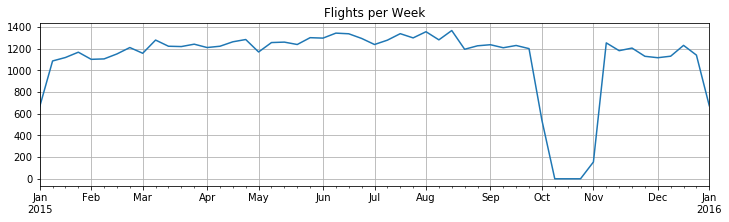

In [43]:
flights.index = flight_dep
fc = flights.resample('W').size()
fc.plot(figsize=(12,3), title='Flights per Week', grid=True)

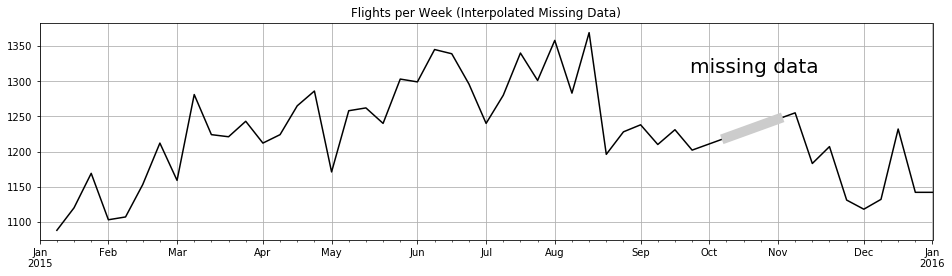

In [44]:
fc_miss = fc.where(fc >  1000)
fc_intp = fc_miss.interpolate(limit_direction='both')

ax = fc_intp.plot(color='black', figsize=(16,4))
fc_intp[fc < 500].plot(linewidth=10, grid=True, 
                       color='.8', ax=ax)

ax.annotate(xy=(.8, .55), xytext=(.8, .77), 
            xycoords='axes fraction', s='missing data', 
            ha='center',  size=20, arrowprops=dict())
ax.set_title('Flights per Week (Interpolated Missing Data)')

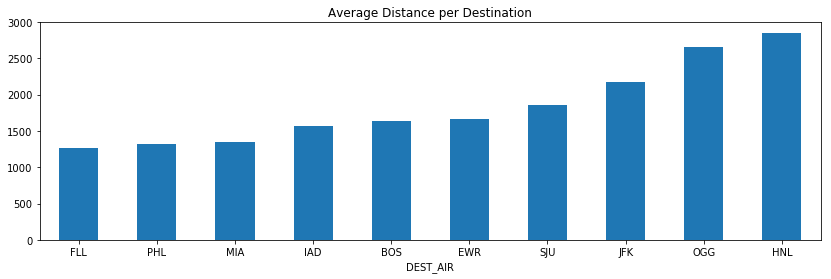

In [45]:
flights.groupby('DEST_AIR')['DIST'] \
       .agg(['mean', 'count']) \
       .query('count > 100') \
       .sort_values('mean') \
       .tail(10) \
       .plot(kind='bar', y='mean', legend=False, 
             rot=0, figsize=(14,4),
             title='Average Distance per Destination')

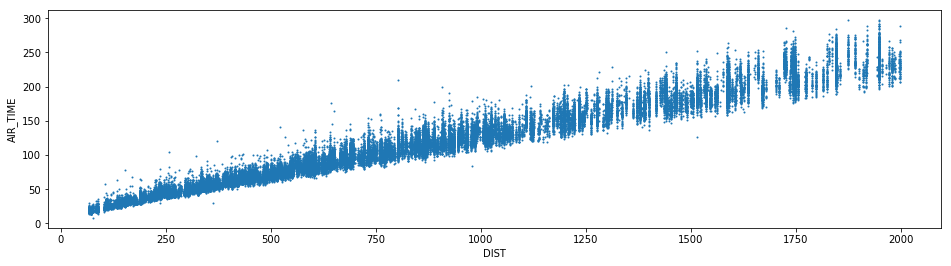

In [46]:
fs = flights.reset_index(drop=True)[['DIST', 'AIR_TIME']].query('DIST <= 2000').dropna()
fs.plot(x='DIST', y='AIR_TIME', kind='scatter', s=1, figsize=(16,4))

In [47]:
fs['DIST_GROUP'] = pd.cut(fs['DIST'], bins=range(0, 2001, 250))
fs['DIST_GROUP'].value_counts().sort_index()

(0, 250]         6529
(250, 500]      12631
(500, 750]      11506
(750, 1000]      8832
(1000, 1250]     5071
(1250, 1500]     3198
(1500, 1750]     3885
(1750, 2000]     1815
Name: DIST_GROUP, dtype: int64

In [48]:
normalize = lambda x: (x - x.mean()) / x.std()
fs['TIME_SCORE'] = fs.groupby('DIST_GROUP')['AIR_TIME'] \
                     .transform(normalize)

fs.head()

,DIST,AIR_TIME,DIST_GROUP,TIME_SCORE
0,590,94.0,"(500, 750]",0.490966
1,1452,154.0,"(1250, 1500]",-1.267551
2,641,85.0,"(500, 750]",-0.296749
3,1192,126.0,"(1000, 1250]",-1.211020
4,1363,166.0,"(1250, 1500]",-0.521999


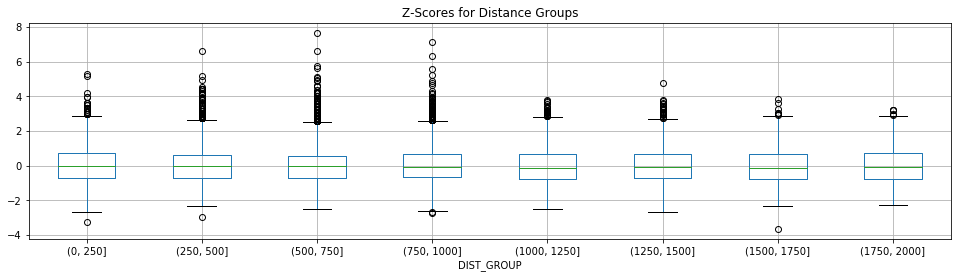

In [49]:
ax = fs.boxplot(by='DIST_GROUP', column='TIME_SCORE', figsize=(16,4))
ax.set_title('Z-Scores for Distance Groups')
ax.figure.suptitle('')

In [50]:
outliers = flights.iloc[fs[fs['TIME_SCORE'] > 6].index]
outliers = outliers[['AIRLINE','ORG_AIR', 'DEST_AIR', 'AIR_TIME', 
                     'DIST', 'ARR_DELAY', 'DIVERTED']]
outliers['PLOT_NUM'] = range(1, len(outliers) + 1)
outliers

,AIRLINE,ORG_AIR,DEST_AIR,AIR_TIME,DIST,ARR_DELAY,DIVERTED,PLOT_NUM
2015-04-08 09:40:00,DL,ATL,CVG,121.0,373,54.0,0,1
2015-05-25 16:30:00,F9,MSP,ATL,199.0,907,79.0,0,2
2015-09-10 20:00:00,UA,IAH,MCI,176.0,643,76.0,0,3
2015-12-10 19:53:00,OO,PHX,SFO,164.0,651,146.0,0,4
2015-12-26 09:15:00,NK,ORD,DFW,210.0,802,98.0,0,5


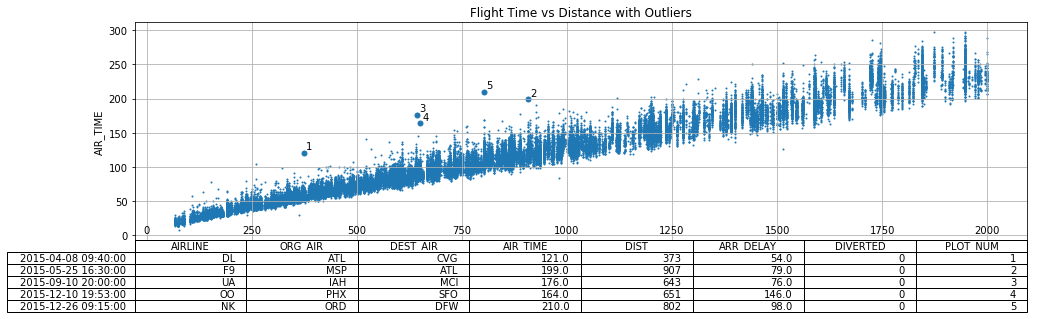

In [51]:
ax = fs.plot(x='DIST', y='AIR_TIME', 
             kind='scatter', s=1, 
             figsize=(16,4), table=outliers)
outliers.plot(x='DIST', y='AIR_TIME',
              kind='scatter', s=25, ax=ax, grid=True)

outs = outliers[['AIR_TIME', 'DIST', 'PLOT_NUM']]
for t, d, n  in outs.itertuples(index=False):
    ax.text(d + 5, t + 5, str(n))
    
plt.setp(ax.get_xticklabels(), y=.1)
plt.setp(ax.get_xticklines(), visible=False)
ax.set_xlabel('')
ax.set_title('Flight Time vs Distance with Outliers')